In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



In [2]:
#step:1   we r doing eda(exploratary data analysis)
#how to open csv file in jupyter notebook with help of pandas library
df=pd.read_csv('Automobile_data.csv')
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [3]:
#step2:  checking null value in given data set mei
df.isnull().sum()
#from below analysis we can say that ki no null value present in a given data set mei
#agar null value hota koi column toh mujhe us null ko fill krna pdta
#agar coloumn=contineous numeric data type value hota..........toh mei mean/median se fill kr deta
#agar column=discrete/object/string data type value hota toh.......mei fill krta mode se

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

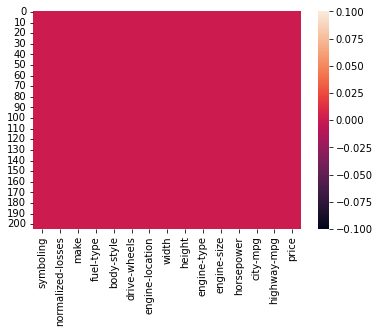

In [4]:
#if i want to visualize the null value how it can achieve 
#it achieve by using heatmap of seaborn library
#below given its syntax:
sb.heatmap(df.isnull())
plt.show()
#below graph we can clearly see that ki no null is present in this data set mei

In [5]:
#now we r checking the dtypes of given dataset column ka by using inbuilt attributes dtypes of pandas library ka
#and it shows columns ka dtypes
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

#next step kya hai?: jo (attributes)dtypes se return aaya hai aab mujhe ek bar individually har ek column ko
#check krna padegha manually....dtypes jo attributes se aaya hai same hai ki nahi......
#agar same nahi hai....toh mujhe given dataset ke column ka dtype change krna padegh....
#by using this syntax:
df['column name jiska datatype change krna hai']=df['column name jiska datatype change krna hai'].astype('float/int')


In [6]:
df.sample(10)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
189,3,?,volkswagen,gas,convertible,fwd,front,64.2,55.6,ohc,109,90,24,29,11595
142,0,102,subaru,gas,sedan,fwd,front,65.4,52.5,ohcf,108,82,28,33,7775
163,1,168,toyota,gas,sedan,rwd,front,64.0,52.6,ohc,98,70,29,34,8058
74,1,?,mercedes-benz,gas,hardtop,rwd,front,72.0,55.4,ohcv,304,184,14,16,45400
27,1,148,dodge,gas,sedan,fwd,front,63.8,50.6,ohc,98,102,24,30,8558
196,-2,103,volvo,gas,sedan,rwd,front,67.2,56.2,ohc,141,114,24,28,15985
78,2,161,mitsubishi,gas,hatchback,fwd,front,64.4,50.8,ohc,92,68,31,38,6669
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
195,-1,74,volvo,gas,wagon,rwd,front,67.2,57.5,ohc,141,114,23,28,13415
105,3,194,nissan,gas,hatchback,rwd,front,67.9,49.7,ohcv,181,200,17,23,19699


In [7]:
#from above we can clearly see that ki df['normalized-losses'] naam ka column hai uske andar jo row/records hai
#woh integer value hai........lekin us column ka dtypes object bata raha hai why?
#bcoz df['normalized-losses'] some one has used special character(eg:,.#@!-....soon)
#as we now that string data type has more prescendence than other data type..........
#thats why its showing discret/object data type column
# now we have to check that ki in df['normalized-losses'] ka column hai
#kon sa special character use hua hai

In [8]:
#now we r checking what type special character used in df['normalized-losses'] naam ke column mei
#using python concept:
x=df['normalized-losses']
c=0
for i,v in enumerate(x):
    #print(i,v)
    if not v.isnumeric():
        print(i," ",v)
        c+=1
print("the total no of special character is:",c)
    

0   ?
1   ?
2   ?
5   ?
7   ?
9   ?
14   ?
15   ?
16   ?
17   ?
43   ?
44   ?
45   ?
46   ?
48   ?
49   ?
63   ?
66   ?
71   ?
73   ?
74   ?
75   ?
82   ?
83   ?
84   ?
109   ?
110   ?
113   ?
114   ?
124   ?
126   ?
127   ?
128   ?
129   ?
130   ?
131   ?
181   ?
189   ?
191   ?
192   ?
193   ?
the total no of special character is: 41


In [9]:
#step:3
#now i am replacing the special character '?' from df['normalized-losses'] with null value by using numpy library
#using replace inbuilt function of numpy library ka
df['normalized-losses']=df['normalized-losses'].replace('?',np.nan)

In [10]:
#step:4
#similarly df['horsepower'] naam ka column uska dtype object aa raha hai
#lekin uske andar record integer show ho raha hai.....so iskey andar bhi shayad special character use hua hai
#ab mujhe us special character replace krna hoga null value se


In [11]:
#sab se phele check karengey kon sa special character present hai df['horsepower'] naam ke column mei
x=df['horsepower']
c=0
for i,v in enumerate(x):
    if not v.isnumeric():
        print(i," ",v)
        c+=1
print("the total no of special character present in record:",c)

130   ?
131   ?
the total no of special character present in record: 2


In [12]:
#now special character replace karengey with null valuse se
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [13]:
#finally ab check karengey dtypes of given dataset ka and null value of dataset ka
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [14]:
#lekin fir bhi normalised-losses column or horsepower ka column
#object/discrete/string/categorical data type value show ho rha hai

In [15]:
#ab mujhe object/discrete/string/categorical data type value convert krna hai integer ya float mei
#how it can achieve using inbuilt function of astype('object/int/float') of pandas library ka
#achieve by this syntax se:
df['normalized-losses']=df['normalized-losses'].astype('float')


In [16]:
#similarly i am changing horsepower column ke data type also by using builtin function astype()
df['horsepower']=df['horsepower'].astype('float')
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [17]:
#checking null value again
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

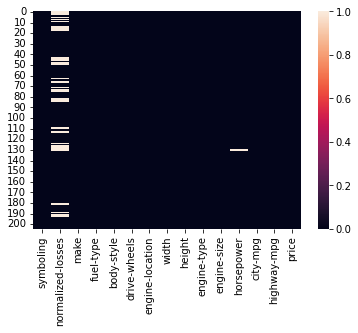

In [18]:
#here we clearly see that ki normalized-losses mei aur horsepower naam ke column mei null value present hai!
#if any one ask me to visualize the null value after whatever the change you have made it
# so i am using heatmap graph of seaborn library for visualization of null value ke liye
sb.heatmap(df.isnull())
plt.show()
#below white line clearly indicate that null value present in which column mei

In [19]:
#before filling the null value first i have to check the percentage of null value present in dataset mei
#if null value in any column % coming out more than 50% so i can remove the column from given data set
#by using drop() function of numpy library ka
#if %is less than 50% so i can fill with mean/median/mode se
df.isnull().sum()/df.shape[0]*100

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
width                 0.00000
height                0.00000
engine-type           0.00000
engine-size           0.00000
horsepower            0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 0.00000
dtype: float64

In [20]:
#here normalized-losses and horsepower showing null % less than 50%
#now i have fill the null value with mean/median/mode se according to the data type of columns
df['normalized-losses'].fillna(df['normalized-losses'].mean(),inplace=True)
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)


In [21]:
#now i am checking that ki null value fill hua hai kya mean/median/mode accoring to data type of column ke according
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [22]:
#step : now we r checking any duplicate record present in data set mei
#if its present then we have to remove the duplicate record
#if not move forward 
#checking by using this syntax
df.duplicated().sum()

0

In [23]:
#step:5 
#know i have to check for outliers (any outlier present in any columns of data set mei)
#for that i have to use boxplot() graph 
#boxplot graph we used to find the outlier in given data set mei
#boxplot() graph we used only on contineous numeric data type value pe 
#boxplot is built in graph of seaborn library

<AxesSubplot:xlabel='price'>

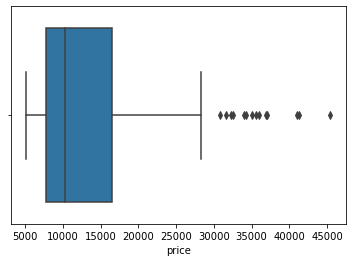

In [24]:
sb.boxplot(data=df,x='price')

In [25]:
#from above box plot graph se we can clearly see that ki upper whisker se outlier of data
#pblm is that we cant remove directly that outlier data without asking my seniors
#according to my domain knowledge price is dependent variable and depend on different different output pe
#domain knowlegde ke according i know that ki price is depend on brand car pe
#biggerbrand means bigger price or vice versa
#so i have to plot......boxplot graph for price vs brandcar(means:manufacturing)

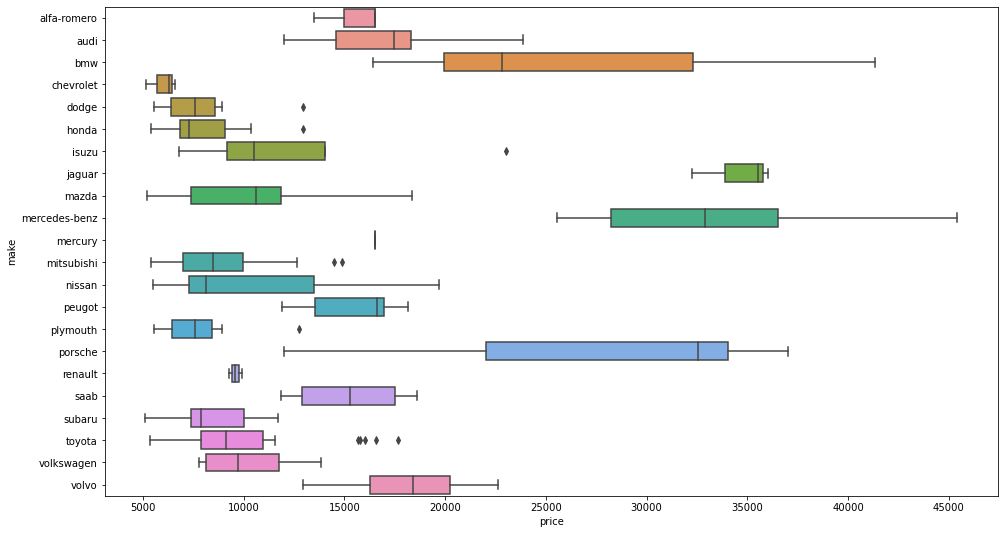

In [26]:
plt.figure(figsize=(16,9))
sb.boxplot(data=df,x='price',y='make')
plt.show()

In [27]:
#now i have to remove outliers according to price and make of car ka dataset se
#i am removing outlier from toyota brand car whose price>12000
df[(df['make']=='toyota')&(df['price']>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [28]:
#so index 172 se 181 this data showing outlier it means i have to remove/drop that record from data set se
#u can hold all the index number in object mei
#first u have to find index of dataset ka whos showing outliers
#by using index attribute of numpy library
x=df[(df['make']=='toyota')&(df['price']>12000)].index
print(x)
df.drop(x,inplace=True)
#inplace=matlab permanently chgange hua hai


Int64Index([172, 178, 179, 180, 181], dtype='int64')


In [29]:
#to check ki outlier remove hua hai kya toyota car se
#again i have to draw boxplot of make and price ka


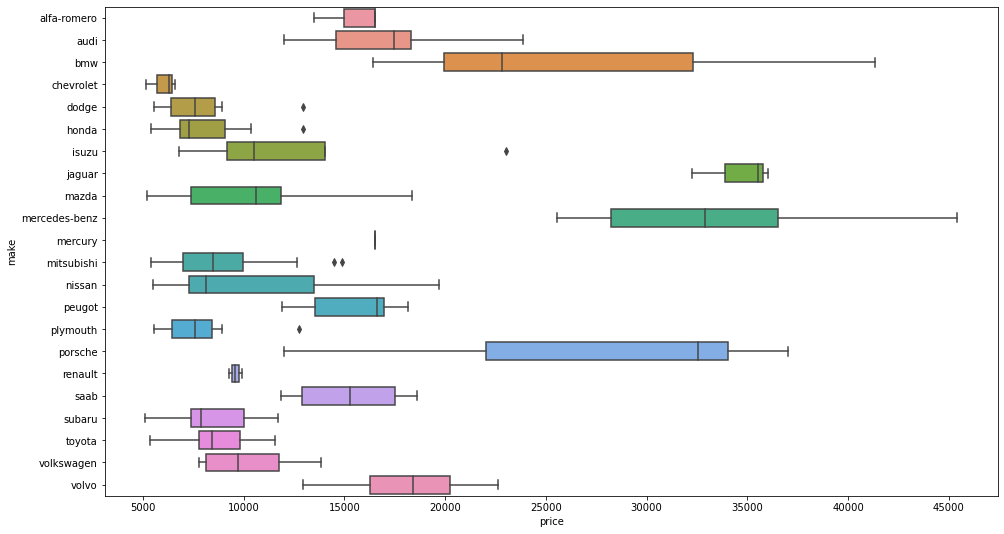

In [30]:
plt.figure(figsize=(16,9))
sb.boxplot(data=df,x='price',y='make')
plt.show()

In [31]:
#so according to make vs price ke according outlier remove karegey sabhi dataset key
#i m removing outlier from plymouth car brand se
df[(df['make']=='plymouth')&(df['price']>8000)]
x=df[(df['make']=='plymouth')&(df['price']>8000)].index
df.drop(x,inplace=True)

In [32]:
#removing outlier from mitsubishi make vs price se
df[(df['make']=='mitsubishi')&(df['price']>12000)]
x=df[(df['make']=='mitsubishi')&(df['price']>12000)].index
df.drop(x,inplace=True)

In [33]:
#removing outlier from isuzu make vs price se
df[(df['make']=='isuzu')&(df['price']>14000)]
x=df[(df['make']=='isuzu')&(df['price']>14000)].index
df.drop(x,inplace=True)

In [34]:
#removing outlier from honda make vs price se
df[(df['make']=='honda')&(df['price']>11000)]
x=df[(df['make']=='honda')&(df['price']>11000)].index
df.drop(x,inplace=True)

In [35]:
#removing outlier from isuzu make vs price se
df[(df['make']=='dodge')&(df['price']>9000)]
x=df[(df['make']=='dodge')&(df['price']>9000)].index
df.drop(x,inplace=True)

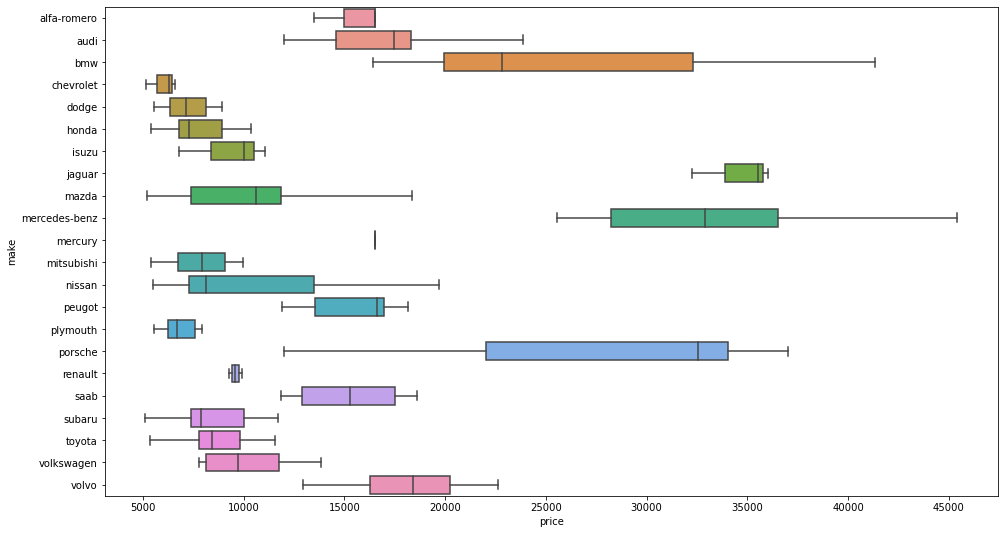

In [36]:
#know finally i am checking that outlier is removed or not 
#again plotting boxplot graph
plt.figure(figsize=(16,9))
sb.boxplot(data=df,x='price',y='make')
plt.show()
#below box plot graph has no outlier removed it successfully

In [37]:
#step:7
#as we know machine know only numeric value........so thats i have to convert
#object/discrete type column in to numeric mei
#it achieve by using label encoder of sklearn library ka

#given below step u have to follow

#split df into two df mei
#first df hold all object type data
#second df hold all numerical type data
#first create df name df_cat which hold object type data



In [38]:
df_cat=df.select_dtypes('object')

df_cat.dtypes

make               object
fuel-type          object
body-style         object
drive-wheels       object
engine-location    object
engine-type        object
dtype: object

In [39]:
df_num=df.select_dtypes(['int64','float64'])
df_num.dtypes

symboling              int64
normalized-losses    float64
width                float64
height               float64
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [40]:
#now converting object datatype into numeric data type value mei
#using label encoder

In [41]:
x=df_cat  #yeh list banake degha sabi object
#print(x)
for col in x:
    #print(col)
    le=LabelEncoder()
    x[col]=le.fit_transform(x[col])    #x[col] means x df object [col] ki value

In [42]:
x.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


In [43]:
x.dtypes

make               int32
fuel-type          int32
body-style         int32
drive-wheels       int32
engine-location    int32
engine-type        int32
dtype: object

column name:symboling and skew of column is:0.21375012897839346


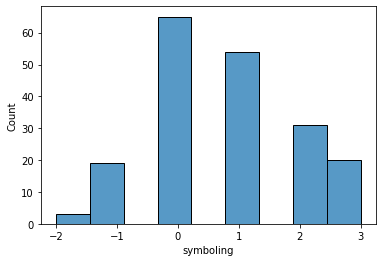

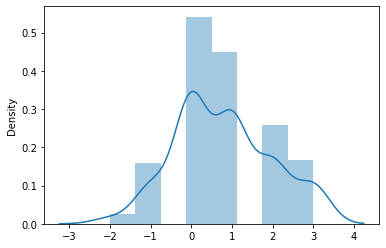

column name:normalized-losses and skew of column is:0.8605288870365656


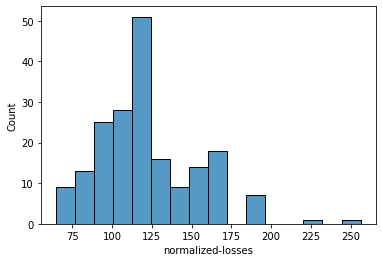

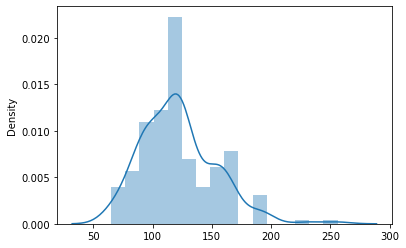

column name:width and skew of column is:0.9139217115506211


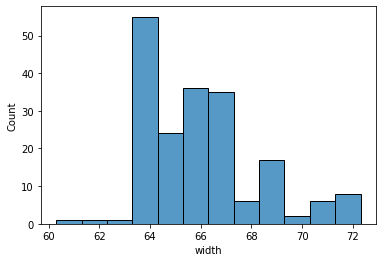

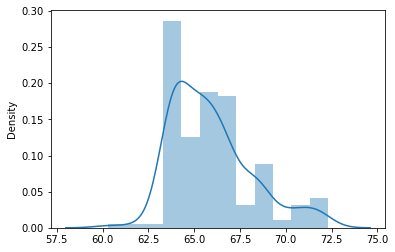

column name:height and skew of column is:-0.03266383402594546


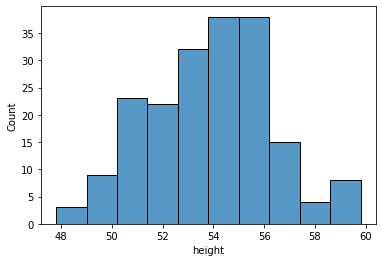

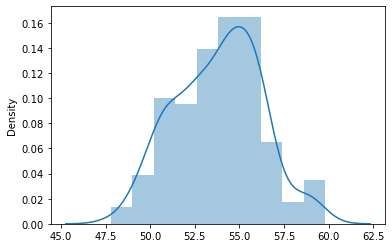

column name:engine-size and skew of column is:2.0762113811903333


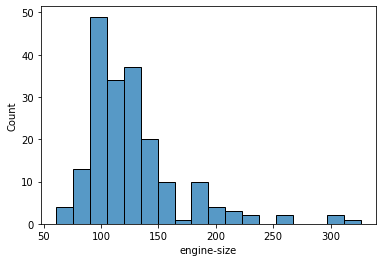

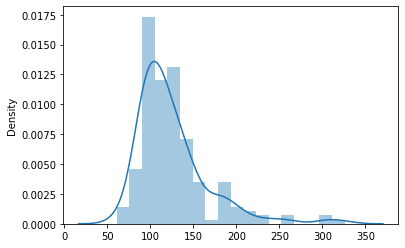

column name:horsepower and skew of column is:1.580710916639858


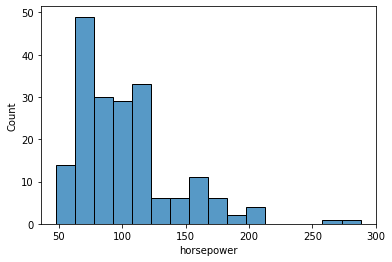

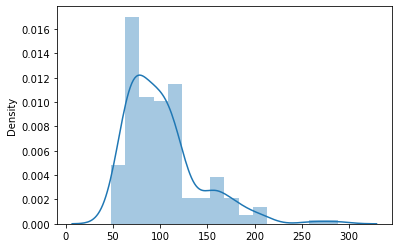

column name:city-mpg and skew of column is:0.5924481768047613


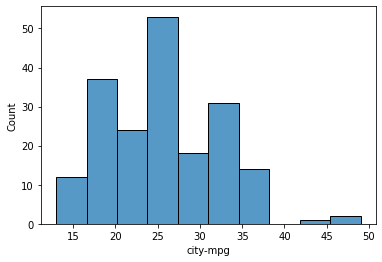

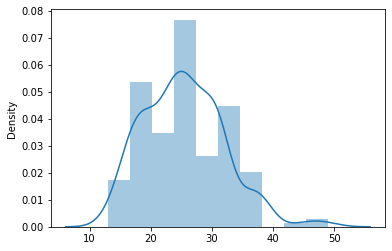

column name:highway-mpg and skew of column is:0.46852441123405975


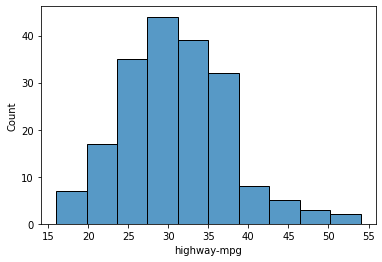

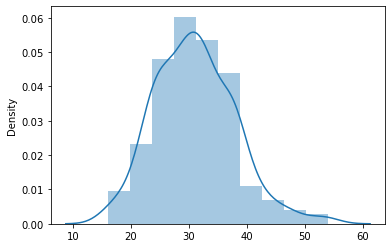

column name:price and skew of column is:1.8171137431304791


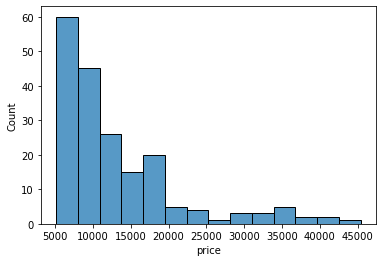

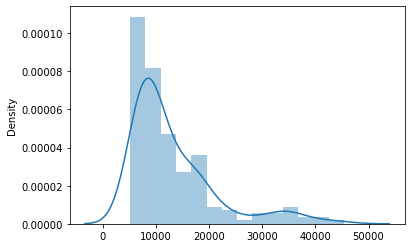

In [44]:
#now i am checking skewness of contineous numeric data type column ka which is df_num
#by using distplot/histogram/histplot graph se
#as we know that ki df_num object has n number of column present in it
#so we using python loop concept
col=df_num.columns   #it return tuple of list ko
for i in col:
    skewness=df_num[i].skew()
    #agar mei chahta hu ki mere graph par column name and skewness value aaye 
    #to use this step
    print(f'column name:{i} and skew of column is:{skewness}')
    sb.histplot(data=df_num[i])
    plt.show()
    sb.distplot(x=df_num[i])
    plt.show()

    


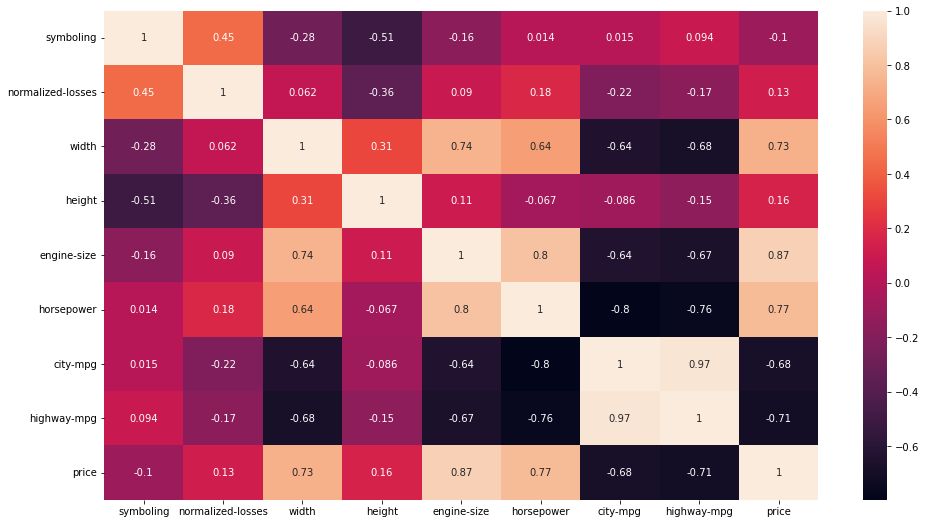

In [45]:
# to minimize the skewness value incolumn se of given data set ke (df_num)
#first i have to check correlation btn input variable vs output variable se
#so i am using heatmap to visualize correlation of seaborn library
plt.figure(figsize=(16,9))
sb.heatmap(df_num.corr(),annot=True)
plt.show()


In [46]:
#but height column skewness value coming approx=0
#from above we clearly observe that ki symboling and normalized-losses and height have correlation value<+-0.5 so we can say 
#that its very bad correlate with price output se
#so i am gonna minimize the symboling and normalized-losses ka skewness column by using transformation
#before directly jump into transformation first i have to check that
#ki symboling and normalized-losses have any negative record present init
#if it is yes we r not going to transform the column......bcoz it change the pattern of dataset ka
#if no then only we use transformation
#either by sqrt() and log()

In [47]:
#know i am checking that ki symboling and normalized-losses column koi negative record toh present nhi hai naa
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [48]:
df_num
nv=0 #i am assming initially no negative present in record of column mei
x=['symboling', 'normalized-losses']
n=len(x)
for i in x:
    for index,value in enumerate(df_num[i]):
        if value<0:
            nv+=1
            print('negative value found',i)
            break
if nv==0:
    print('not found',i)



negative value found symboling


In [49]:
#from above concept it clearly observe that symboling column has negative value present.......so we r
#avoiding symboling column for minimizing skewness ke liye

In [50]:
#now i am minimizing the skewness of normalized-losses by using treansformation of log() inbuilt method of numpy library
df_num['normalized-losses']=np.log(df_num['normalized-losses'])

In [51]:
#to check again the skewness of df_num['normalized-losses']
df_num['normalized-losses'].skew()

0.024894619921583858

In [52]:
#to visualize the df_num['normalized-losses'] ka skewness i have to use
#distplot()
#or histplot()

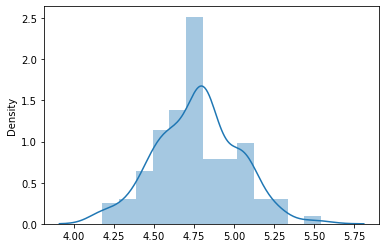

In [53]:
sb.distplot(x=df_num['normalized-losses'])
plt.show()

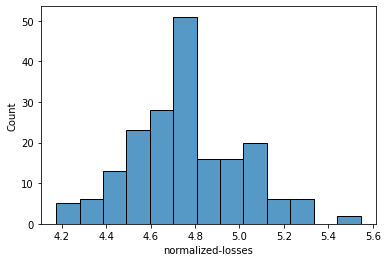

In [54]:
sb.histplot(x=df_num['normalized-losses'])
plt.show()

In [55]:
#now i am merging/adding df_num and df_cat into df_new object mei
#by using concat() inbuilt method of pandas library ka
df_new=pd.concat([df_cat,df_num],axis=1)
df_new

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,4.804021,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,4.804021,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,4.804021,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,5.099866,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,5.099866,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,3,2,0,3,-1,4.553877,68.9,55.5,141,114.0,23,28,16845
201,21,1,3,2,0,3,-1,4.553877,68.8,55.5,141,160.0,19,25,19045
202,21,1,3,2,0,5,-1,4.553877,68.9,55.5,173,134.0,18,23,21485
203,21,0,3,2,0,3,-1,4.553877,68.9,55.5,145,106.0,26,27,22470


In [56]:
#last step we r doing scaling in which we r changing the unit of dataset into special unit
#to achieve scaleing i am using standardscaler class of sklearn library/package ka
#and i real world we r doing scaling only on input variable not on output variable so we r iignoring output variable
df_new.columns


Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type', 'symboling', 'normalized-losses', 'width', 'height',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [57]:
lst=[['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type', 'symboling', 'normalized-losses', 'width', 'height',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']]  #variable creating and doing scaling 
for i,val in enumerate(lst):
    ss=StandardScaler()
    df_new[val]=ss.fit_transform(df_new[val])

In [58]:
df_new

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,-1.924008,0.340997,-3.116631,1.224406,-0.125988,-3.095684,1.865777,0.137881,-0.819430,-2.085731,0.107166,0.221922,-0.680267,-0.585095,13495
1,-1.924008,0.340997,-3.116631,1.224406,-0.125988,-3.095684,1.865777,0.137881,-0.819430,-2.085731,0.107166,0.221922,-0.680267,-0.585095,16500
2,-1.924008,0.340997,-0.746757,1.224406,-0.125988,1.932838,0.179993,0.137881,-0.180987,-0.586971,0.629880,1.316751,-0.985791,-0.730422,16500
3,-1.765395,0.340997,0.438180,-0.570143,-0.125988,-0.078571,1.022885,1.311332,0.138234,0.204041,-0.391788,-0.007229,-0.221982,-0.149112,13950
4,-1.765395,0.340997,0.438180,-2.364693,-0.125988,-0.078571,1.022885,1.311332,0.229440,0.204041,0.249724,0.323766,-1.138552,-1.311732,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.406864,0.340997,0.438180,1.224406,-0.125988,-0.078571,-1.505791,-0.854299,1.369516,0.703628,0.368523,0.298305,-0.374744,-0.439767,16845
201,1.406864,0.340997,0.438180,1.224406,-0.125988,-0.078571,-1.505791,-0.854299,1.323913,0.703628,0.368523,1.469518,-0.985791,-0.875750,19045
202,1.406864,0.340997,0.438180,1.224406,-0.125988,1.932838,-1.505791,-0.854299,1.369516,0.703628,1.128833,0.807528,-1.138552,-1.166405,21485
203,1.406864,-2.932576,0.438180,1.224406,-0.125988,-0.078571,-1.505791,-0.854299,1.369516,0.703628,0.463562,0.094616,0.083542,-0.585095,22470


In [59]:
#note: hum always machine ko dataset as 2d numpy array mei deta hai
#we always give the dataset to machine only in 2d numpy array ......for fast processing ke liye machine ko
#so we have to convert the datset into 2d numpy array me by using inbuilt attribute of values of numpy library
df_new.values

array([[-1.92400836e+00,  3.40997170e-01, -3.11663086e+00, ...,
        -6.80267140e-01, -5.85094696e-01,  1.34950000e+04],
       [-1.92400836e+00,  3.40997170e-01, -3.11663086e+00, ...,
        -6.80267140e-01, -5.85094696e-01,  1.65000000e+04],
       [-1.92400836e+00,  3.40997170e-01, -7.46757097e-01, ...,
        -9.85790627e-01, -7.30422227e-01,  1.65000000e+04],
       ...,
       [ 1.40686399e+00,  3.40997170e-01,  4.38179784e-01, ...,
        -1.13855237e+00, -1.16640482e+00,  2.14850000e+04],
       [ 1.40686399e+00, -2.93257566e+00,  4.38179784e-01, ...,
         8.35415786e-02, -5.85094696e-01,  2.24700000e+04],
       [ 1.40686399e+00,  3.40997170e-01,  4.38179784e-01, ...,
        -9.85790627e-01, -8.75749758e-01,  2.26250000e+04]])

In [60]:
#final step its optional to add new column in a datset mei is called feature engineering why it is important
#how i can achieve feature engineering
#some concept
#feature engineering as fe
#hum fe issliye krte ki machine fast process krey aur iss fe mei hum unwanted column ko remove krte hai with new column se
#jo new column hoga woh fully depend hoga unwanted column pe
#example above
#fe ki help se hum area column ban skte hai==== length and height of column ko hata ke
#iss se column size kum hoga aur machine ki processing fast ho jayegha



In [61]:
df_new['area']=df_new['width']*df_new['height']
#new column as area ban jayegha dataset mei width and height column bhi rahegha data set mei
#apne senior se baat kr ke we remove the column
#aur yeh new column scaling ho ke milegha
df_new

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,area
0,-1.924008,0.340997,-3.116631,1.224406,-0.125988,-3.095684,1.865777,0.137881,-0.819430,-2.085731,0.107166,0.221922,-0.680267,-0.585095,13495,1.709109
1,-1.924008,0.340997,-3.116631,1.224406,-0.125988,-3.095684,1.865777,0.137881,-0.819430,-2.085731,0.107166,0.221922,-0.680267,-0.585095,16500,1.709109
2,-1.924008,0.340997,-0.746757,1.224406,-0.125988,1.932838,0.179993,0.137881,-0.180987,-0.586971,0.629880,1.316751,-0.985791,-0.730422,16500,0.106234
3,-1.765395,0.340997,0.438180,-0.570143,-0.125988,-0.078571,1.022885,1.311332,0.138234,0.204041,-0.391788,-0.007229,-0.221982,-0.149112,13950,0.028205
4,-1.765395,0.340997,0.438180,-2.364693,-0.125988,-0.078571,1.022885,1.311332,0.229440,0.204041,0.249724,0.323766,-1.138552,-1.311732,17450,0.046815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.406864,0.340997,0.438180,1.224406,-0.125988,-0.078571,-1.505791,-0.854299,1.369516,0.703628,0.368523,0.298305,-0.374744,-0.439767,16845,0.963630
201,1.406864,0.340997,0.438180,1.224406,-0.125988,-0.078571,-1.505791,-0.854299,1.323913,0.703628,0.368523,1.469518,-0.985791,-0.875750,19045,0.931542
202,1.406864,0.340997,0.438180,1.224406,-0.125988,1.932838,-1.505791,-0.854299,1.369516,0.703628,1.128833,0.807528,-1.138552,-1.166405,21485,0.963630
203,1.406864,-2.932576,0.438180,1.224406,-0.125988,-0.078571,-1.505791,-0.854299,1.369516,0.703628,0.463562,0.094616,0.083542,-0.585095,22470,0.963630
